## 1. 데이터 탐색 및 환경설정

In [1]:
!pip install pandas
!pip install matplotlib
!pip install imblearn
!pip install datetime
!pip install sklearn
!pip install imblearn
!pip install tensorflow

     -------------------------------------- 258.3/258.3 kB 3.2 MB/s eta 0:00:00
     --------------------------------------- 12.9/12.9 MB 59.5 MB/s eta 0:00:00
     --------------------------------------- 44.8/44.8 MB 32.7 MB/s eta 0:00:00
     --------------------------------------- 11.0/11.0 MB 32.7 MB/s eta 0:00:00
     ------------------------------------- 301.8/301.8 kB 18.2 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 52.6/52.6 kB ? eta 0:00:00
     ------------------------------------- 212.1/212.1 kB 12.6 MB/s eta 0:00:00
     ------------------------------------- 508.0/508.0 kB 33.2 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag


[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     ------------------------------------- 390.2/390.2 MB 12.1 MB/s eta 0:00:00
     ---------------------------------------- 133.7/133.7 kB ? eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 3.0 MB/s eta 0:00:00
     --------------------------------------- 26.4/26.4 MB 46.7 MB/s eta 0:00:00
     ---------------------------------------- 71.9/71.9 kB ? eta 0:00:00
     ------------------------------------- 431.5/431.5 kB 26.3 MB/s eta 0:00:00
     ---------------------------------------- 64.9/64.9 kB 3.4 MB/s eta 0:00:00
     ---------------------------------------- 4.4/4.4 MB 69.0 MB/s eta 0:00:00
     ---------------------------------------- 5.5/5.5 MB 70.4 MB/s eta 0:00:00
     ---------------------------------------- 1.2/1.2 MB 78.7 MB/s eta 0:00:00
     --------------------------------------- 15.9/15.9 MB 65.6 MB/s eta 0:00:00
     ---------------------------------------- 3.0/3.0 MB 96.6 MB/s eta 0:00:00
     -------------------------------------- 126.7/126.7 


[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import sys
from datetime import datetime
import tensorflow as tf
from tensorflow import keras
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from imblearn.over_sampling import SMOTE
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [157]:
df = pd.read_csv('경진대회용 주조 공정최적화 데이터셋.csv', encoding='cp949')

C:\Users\세종tp\AppData\Local\Temp\ipykernel_14868\3623579974.py:1: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('경진대회용 주조 공정최적화 데이터셋.csv', encoding='cp949')


## 2. 데이터 특성

### 2-1. 데이터 파악

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92015 entries, 0 to 92014
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    92015 non-null  int64  
 1   line                          92015 non-null  object 
 2   name                          92015 non-null  object 
 3   mold_name                     92015 non-null  object 
 4   time                          92015 non-null  object 
 5   date                          92015 non-null  object 
 6   count                         92015 non-null  int64  
 7   working                       92014 non-null  object 
 8   emergency_stop                92014 non-null  object 
 9   molten_temp                   89754 non-null  float64
 10  facility_operation_cycleTime  92015 non-null  int64  
 11  production_cycletime          92015 non-null  int64  
 12  low_section_speed             92014 non-null  float64
 13  h

In [180]:
df.describe()

,Unnamed: 0,count,molten_temp,facility_operation_cycleTime,production_cycletime,low_section_speed,high_section_speed,molten_volume,cast_pressure,biscuit_thickness,...,upper_mold_temp3,lower_mold_temp1,lower_mold_temp2,lower_mold_temp3,sleeve_temperature,physical_strength,Coolant_temperature,EMS_operation_time,passorfail,mold_code
count,92015.000000,92015.000000,89754.000000,92015.000000,92015.000000,92014.000000,92014.000000,46885.000000,92014.000000,92014.000000,...,91702.000000,92014.000000,92014.000000,91702.000000,92014.000000,92014.000000,92014.000000,92015.000000,92014.000000,92015.000000
mean,46007.000000,148.510895,718.618513,121.555007,122.514525,110.794999,112.624959,154.976624,324.554535,50.666486,...,1320.032278,203.766155,200.021725,1441.953033,418.613255,701.262493,32.332938,18.417595,0.043646,8674.612313
std,26562.586847,87.969953,51.728659,12.116145,13.595314,305.181962,10.759272,485.640901,27.327683,17.925620,...,392.371589,53.437545,45.216804,219.178967,115.831898,373.634822,14.265024,8.356021,0.204306,205.609122
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.000000,0.000000,...,42.000000,18.000000,20.000000,299.000000,23.000000,0.000000,16.000000,0.000000,0.000000,8412.000000
25%,23003.500000,72.000000,713.000000,117.000000,119.000000,110.000000,112.000000,49.000000,329.000000,47.000000,...,1449.000000,165.000000,172.000000,1449.000000,383.000000,697.000000,31.000000,23.000000,0.000000,8413.000000
50%,46007.000000,146.000000,728.000000,119.000000,121.000000,110.000000,112.000000,67.000000,330.000000,50.000000,...,1449.000000,208.000000,198.000000,1449.000000,461.000000,703.000000,32.000000,23.000000,0.000000,8722.000000
75%,69010.500000,222.000000,730.000000,122.000000,123.000000,110.000000,112.000000,85.000000,331.000000,53.000000,...,1449.000000,250.000000,229.000000,1449.000000,484.000000,710.000000,34.000000,23.000000,0.000000,8917.000000
max,92014.000000,334.000000,735.000000,457.000000,485.000000,65535.000000,388.000000,2767.000000,348.000000,422.000000,...,1449.000000,369.000000,1449.000000,65503.000000,1449.000000,65535.000000,1449.000000,25.000000,1.000000,8917.000000


### 2-2. 결측치 확인 및 처리

In [181]:
missing_columns = df.columns[df.isnull().any()]
missing_count = df.isnull().sum()
missing_ratio = (df.isnull().mean() *100).round(3).astype(str) + ' (%)'

# 데이터프레임 생성
missing_df = pd.DataFrame({
    '컬럼명': missing_count.index,
    '결측치 수': missing_count.values,
    '결측치 비율': missing_ratio.values
})

print("\033[1m< 1. 결측치 컬럼 수:\033[0m", len(missing_columns.tolist()), "//", "\033[1m컬럼 수:\033[0m", len(df.columns), ">  \033[0m\n")
print('\033[1m< 2. 결측치 수 (비율) > \033[0m')
missing_df = missing_df[missing_df['결측치 수'] > 0].reset_index(drop=True)

missing_indices_dict = {}
for column in df.columns:
    # print(column)
    missing_indices = df[df[column].isnull()].index.tolist()
    if missing_indices:
        missing_indices_dict[column] = missing_indices

missing_data = pd.DataFrame([missing_indices_dict])
missing_data_reshaped = missing_data.T.reset_index()
missing_data_reshaped.columns = ['칼럼명', '결측치_행번호']


# 왼쪽 정렬하여 병합
merged_df = pd.merge(missing_df, missing_data_reshaped, left_on = '컬럼명', right_on='칼럼명', how = 'left')
merged_df = merged_df[['컬럼명','결측치 수','결측치 비율','결측치_행번호']]
merged_df

< 1. 결측치 컬럼 수: 20 // 컬럼 수: 32 >  

< 2. 결측치 수 (비율) > 


,컬럼명,결측치 수,결측치 비율,결측치_행번호
0,working,1,0.001 (%),[19327]
1,emergency_stop,1,0.001 (%),[19327]
2,molten_temp,2261,2.457 (%),"[11895, 11897, 11899, 11901, 11903, 11905, 119..."
3,low_section_speed,1,0.001 (%),[19327]
4,high_section_speed,1,0.001 (%),[19327]
5,molten_volume,45130,49.046 (%),"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
6,cast_pressure,1,0.001 (%),[19327]
7,biscuit_thickness,1,0.001 (%),[19327]
8,upper_mold_temp1,1,0.001 (%),[19327]
9,upper_mold_temp2,1,0.001 (%),[19327]


In [182]:
# 결측치 처리
# 행번호 19327은 모든 칼럼에 결측치로 확인되어 제거

# 각 리스트를 행으로 펼치기
expanded_df = merged_df.explode('결측치_행번호')
expanded_df = expanded_df[expanded_df['결측치_행번호'] != 19327]

# 다시 리스트 형태로 그룹화
merged_df = expanded_df.groupby(['컬럼명', '결측치 수', '결측치 비율'], as_index = False)['결측치_행번호'].apply(list)

print('\033[1m< 3. 결측치 데이터 > \033[0m')
df[merged_df['컬럼명']].head()

< 3. 결측치 데이터 > 


,heating_furnace,lower_mold_temp3,molten_temp,molten_volume,tryshot_signal,upper_mold_temp3
0,NaN,1449.0,731.0,75.0,NaN,1449.0
1,B,NaN,720.0,NaN,NaN,NaN
2,B,NaN,721.0,NaN,NaN,NaN
3,B,NaN,721.0,NaN,NaN,NaN
4,B,NaN,721.0,NaN,NaN,NaN


In [183]:
data_counts = []
for i in range(len(merged_df)):
    len(df[merged_df['컬럼명'][0]].unique())
    데이터_자료수 = len(df[merged_df['컬럼명'][i]].unique())
    data_counts.append(데이터_자료수)

merged_df['데이터_자료수'] = data_counts

core_missing_df = merged_df[merged_df['데이터_자료수'] < 5].reset_index(drop=True)

core_missing = []
for i in range(len(core_missing_df)):
    core_missing_data = df[core_missing_df['컬럼명'][i]].unique()
    core_missing.append(core_missing_data)

core_missing_df['데이터'] = core_missing
core_missing_df

core_missing_df = pd.merge(merged_df, core_missing_df[['컬럼명','데이터']],
                           on = '컬럼명',
                           how = 'left')

print('\033[1m< 4. 결측치 데이터 정보 > \033[0m')
core_missing_df

< 4. 결측치 데이터 정보 > 


,컬럼명,결측치 수,결측치 비율,결측치_행번호,데이터_자료수,데이터
0,heating_furnace,49146,53.411 (%),"[0, 22, 24, 26, 28, 30, 31, 33, 36, 38, 40, 42...",3,"[nan, B, A]"
1,lower_mold_temp3,313,0.34 (%),"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",315,NaN
2,molten_temp,2261,2.457 (%),"[11895, 11897, 11899, 11901, 11903, 11905, 119...",114,NaN
3,molten_volume,45130,49.046 (%),"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",122,NaN
4,tryshot_signal,90096,97.914 (%),"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",2,"[nan, D]"
5,upper_mold_temp3,313,0.34 (%),"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",118,NaN


### 2-3. 데이터 전처리 - 특성공학(Feature engineering)

In [184]:
# 1) 숫자인데 문자형(str)인 컬럼을 실수형(float) 형식으로 변환
def convert_float(value):
    if isinstance(value, (pd.Timestamp) or pd.isna(value)):
        return value  # 날짜형은 그대로 반환
    try:
        return float(value)
    except(ValueError, TypeError):
        return value

df = df.applymap(convert_float)

# 2) 앞서 컬럼 대부분이 공란이었던 행번호(19327) 제거
re_df = df.drop(index = 19327).reset_index(drop=True)

# 3) 컬럼 값이 1개인 컬럼 제거
df_columns = re_df[re_df.columns[re_df.nunique() != 1]]
df_missing_columns = core_missing_df['컬럼명'].unique()
# combined_columns = list(set(df_columns) | set(missing_columns)) #순서가 바뀌므로 다른 아래 코드로 대체

combined_columns = []
seen = set()
for col in df_columns:
    if col not in seen:
        combined_columns.append(col)
        seen.add(col)

for col in df_missing_columns:
    if col not in seen:
        combined_columns.append(col)
        seen.add(col)

filtered_df = re_df[combined_columns]

# 4) time + date 컬럼 합치기
filtered_df['datetime'] =filtered_df['time'] + ' ' + filtered_df['date']
filtered_df = filtered_df.drop(columns = ['date','time']) # date, time 기존 컬럼 제거
filtered_df.insert(0, 'datetime', filtered_df.pop('datetime')) # datetime 컬럼 맨앞으로 위치
filtered_df['datetime'] = pd.to_datetime(filtered_df['datetime'])
filtered_df['registration_time'] = pd.to_datetime(filtered_df['registration_time'])

# 5) datetime 컬럼과 registartion_time 컬럼이 같다면 제거
if (filtered_df['datetime'] == filtered_df['registration_time']).all:
    filtered_df.drop(columns= 'registration_time', inplace=True)

# 시간 날짜가 같은 행 확인 -> 확인 결과 : 전체 행 중에서 586개의 행이 중복되었음을 확인, 대부분 컬럼 값은 비슷하나 mold_code 값은 대부분 다름. 두 지표중에 같은 컬럼은 단 20개] 
duplicated_dates = filtered_df[filtered_df['datetime'].duplicated(keep = False)]['datetime'] # keep = False : 중복된 모든 값을 포함
filtered_df.iloc[duplicated_dates.index, :]
print(f'\033[1m< 1. 시간이 같은 행 :  {len(filtered_df.iloc[duplicated_dates.index, :])}\033[0m')
# filtered_df.iloc[duplicated_dates.index, :]

duplicate_mold_codes = filtered_df[filtered_df.duplicated(subset=['datetime', 'mold_code'], keep=False)]
print(f'\033[1m< 2. 시간 및 mold_code 같은 행 :  {len(duplicate_mold_codes)}\033[0m')
# duplicate_mold_codes

C:\Users\세종tp\AppData\Local\Temp\ipykernel_14868\98173198.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(convert_float)


< 1. 시간이 같은 행 :  586
< 2. 시간 및 mold_code 같은 행 :  20


C:\Users\세종tp\AppData\Local\Temp\ipykernel_14868\98173198.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['datetime'] =filtered_df['time'] + ' ' + filtered_df['date']


In [185]:
try:
    filtered_df = filtered_df.drop(columns='Unnamed: 0')
except:
    pass

filtered_df

# # 모든 명목형 변수를 변환하고 고유한 값 확인
# for col in filtered_df.select_dtypes(include=['object']).columns:
#     filtered_df[col], unique_values = pd.factorize(filtered_df[col])
#     print(f"Column: {col}")
#     print(f"Unique values: {unique_values}")
#     print(f"Transformed Data:\n{filtered_df}\n")
    
# for col in filtered_df.select_dtypes(include=['object']).columns:
#     filtered_df[col], _ = pd.factorize(filtered_df[col].dropna())

transposed_df = filtered_df.T.reset_index().rename(columns={'index': '컬럼명'})
transposed_df = transposed_df['컬럼명'].to_frame()

# 각 컬럼별 데이터 자료수 확인
data_counts = []
for i in range(len(transposed_df)):
    데이터_자료수 = len(filtered_df[transposed_df['컬럼명'][i]].dropna().unique())
    data_counts.append(데이터_자료수)

transposed_df['데이터_자료수'] = data_counts

# 각 컬럼별 데이터 군 확인
transposed_data = []
for i in range(len(transposed_df)):
    transposed_datum= filtered_df[transposed_df['컬럼명'][i]].unique()
    transposed_data.append(transposed_datum)
    
transposed_df['데이터'] = transposed_data # 데이터 삽입


# '데이터' 컬럼의 모든 리스트를 정렬
def sort_numeric_and_string(lst):

    numeric_sorted = sorted([float(x) for x in lst if isinstance(x, float)])
    date_sorted = sorted([x for x in lst if isinstance(x, pd.Timestamp)], key = lambda x: x)
    string_sorted = sorted([x for x in lst if isinstance(x, str)])
    return numeric_sorted + date_sorted + string_sorted

transposed_df['데이터'] = transposed_df['데이터'].apply(sort_numeric_and_string)
transposed_df

,컬럼명,데이터_자료수,데이터
0,datetime,91721,"[2019-01-02 16:45:06, 2019-01-02 16:45:08, 201..."
1,count,334,"[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, ..."
2,working,2,"[가동, 정지]"
3,molten_temp,113,"[0.0, 7.0, 70.0, 71.0, 72.0, 73.0, 626.0, 629...."
4,facility_operation_cycleTime,194,"[69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76...."
5,production_cycletime,202,"[0.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0..."
6,low_section_speed,123,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ..."
7,high_section_speed,230,"[0.0, 1.0, 3.0, 4.0, 5.0, 8.0, 9.0, 10.0, 31.0..."
8,molten_volume,121,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ..."
9,cast_pressure,124,"[41.0, 45.0, 62.0, 128.0, 129.0, 137.0, 138.0,..."


In [190]:
# 레이블 인코딩 # 원핫 인코딩
# factorize를 사용하여 문자열 데이터만 수치형으로 변환 (원핫인코딩 적용)
# 명목형 변수 => 수치형 변수 (레이블 인코딩, 원핫인코딩 중에서 순서없이 적용하기 위해 원핫인코딩으로 설계)
def factorize_strings(row):
    if isinstance(row['데이터'], list):
        # 문자열 값만 필터링
        string_values = [str(x) for x in row['데이터'] if isinstance(x, str)]
        if string_values:  # 문자열 값이 있을 경우
            labels, uniques = pd.factorize(string_values)
            return labels.tolist()  # 수치형 데이터로 변환
    return row['데이터']  # 문자열이 없으면 원래 데이터 반환

# # 6) 명목형 변수를 수치형 변수로 변환 예) 가동, 정지 => 0, 1 // A, B, C => 0, 1, 2 // Null 값(NaN) => -1 로 변환
transposed_df['데이터'] = transposed_df.apply(factorize_strings, axis = 1)
transposed_df

# 전처리 원본 데이터에도 원핫인코딩 적용
for col in filtered_df.select_dtypes(include=['object']).columns:
    # factorize를 적용하여 수치형으로 변환
    # filtered_df[col], _ = pd.factorize(filtered_df[col])
    filtered_df[col] = pd.factorize(filtered_df[col].where(filtered_df[col].notnull()))[0]
    # filtered_df[col] = pd.factorize(filtered_df[col].where(filtered_df[col].notnull()))[0]

# filtered_df

In [192]:
mold_codes = {}
for i in range(filtered_df['mold_code'].nunique()):
    mold_code = sorted(filtered_df['mold_code'].astype('int').astype(str).unique())[i]
    mold_codes[f'mold_code{i}'] = mold_code

keys = list(mold_codes)
# 결과 출력
for key, value in mold_codes.items():
    print(f'{key} = {value}')
    
    
# mold_code 별 DataFrame 분류 // mold_code(0 ~ 6) , filtered_df : 데이터 원본 
mold_code_dfs = [] # 총 mold_code 는 7개 있으니 dfs 는 0~6까지
for mold_code_values in sorted(filtered_df['mold_code'].unique()):
    mold_code_df = filtered_df[filtered_df['mold_code'] == mold_code_values]
    mold_code_dfs.append(mold_code_df) # 리스트에 DataFrame 추가

mold_code0 = 8412
mold_code1 = 8413
mold_code2 = 8573
mold_code3 = 8576
mold_code4 = 8600
mold_code5 = 8722
mold_code6 = 8917


In [193]:
# 7) 시계열 데이터 구조 생성 (시계열 인덱스 생성)

try:
    filtered_df = filtered_df.set_index('datetime')
except:
    pass
for i in range(len(mold_code_dfs)):
    try:
        mold_code_dfs[i] = mold_code_dfs[i].set_index('datetime')
    except:
        pass

### 2-4. 데이터 분포도

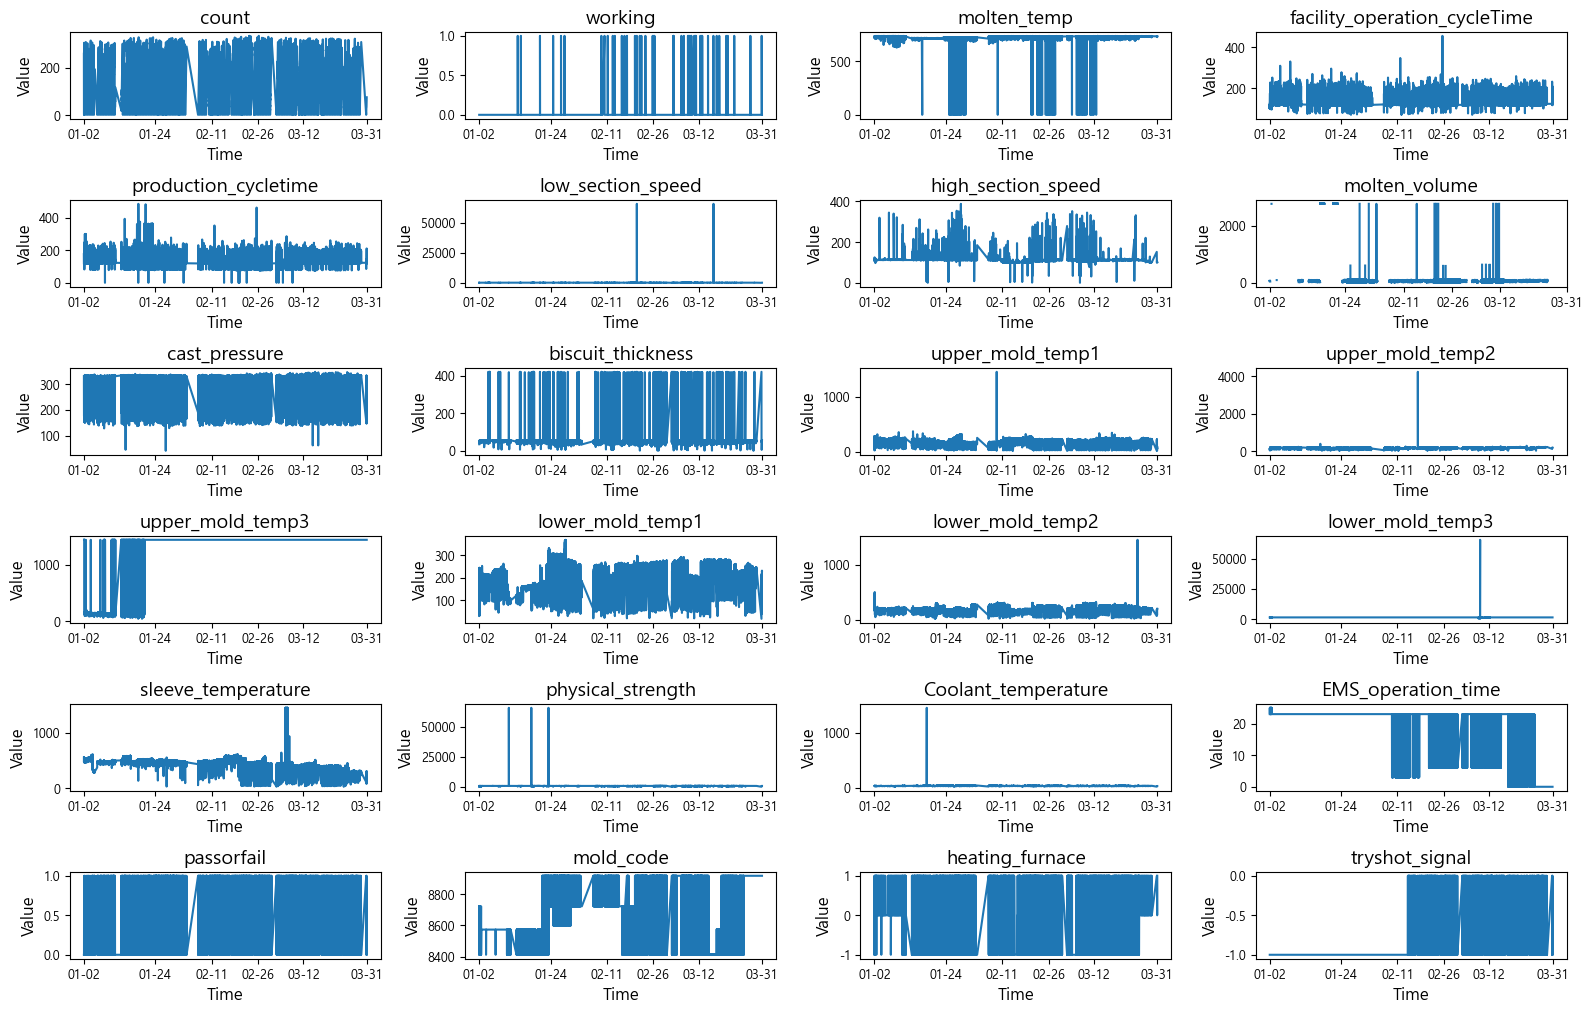

In [194]:
# 그래프 활성화
import matplotlib
matplotlib.rcParams['font.family'] = "Malgun Gothic"
matplotlib.rcParams['font.size'] = 9
matplotlib.rcParams['axes.unicode_minus'] = False # 한글폰트 사용시 깨지는 현상 해결


# '원본 그래프'
fig = plt.figure(figsize=(16, 40))

for i in range(filtered_df.shape[1]):
    ax = fig.add_subplot(24, 4, i+1)
    ax.set_title(filtered_df.columns[i], fontsize = 9, fontweight = 'bold')
    ax.plot(filtered_df.iloc[:, i])
    
    # x축에 4개의 인덱스만 표시
    ticks = filtered_df.index[::len(filtered_df)//5]  # 4개의 인덱스 선택
    ax.set_xticks(ticks)
    ax.set_xticklabels([d.strftime('%m-%d') for d in ticks])  # 날짜 형식으로 표시
    
    ax.set_xlabel('Time', fontsize = 12)
    ax.set_ylabel('Value', fontsize = 12, rotation = 90)
    ax.set_title(filtered_df.columns[i], fontsize=14)

# 서브플롯 간의 수직 간격 조정
plt.subplots_adjust(hspace=3)

# 그래프 레이아웃 자동조정
plt.tight_layout()
plt.show()

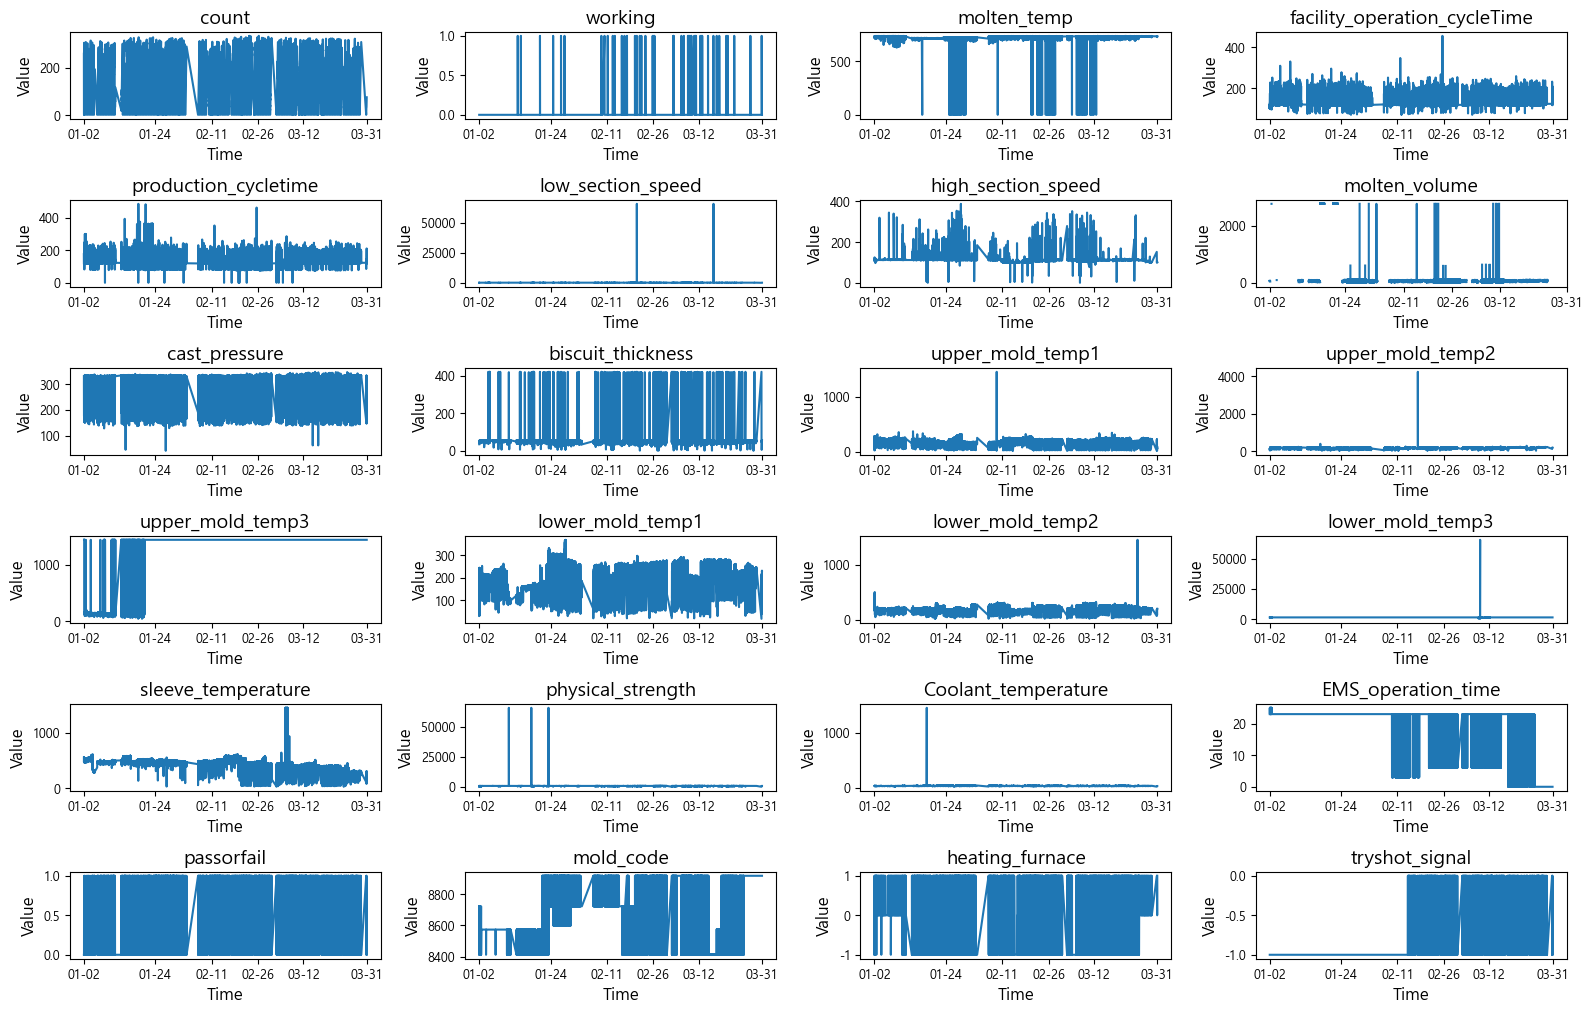

In [195]:
# 'mold_code_dfs1' 그래프
fig = plt.figure(figsize=(16, 40))

for i in range(mold_code_dfs[0].shape[1]):
    # for i in range(mold_code_dfs[j].shape[1]):
    ax = fig.add_subplot(24, 4, i+1)
    ax.set_title(filtered_df.columns[i], fontsize = 9, fontweight = 'bold')
    ax.plot(filtered_df.iloc[:, i])
    
    # x축에 4개의 인덱스만 표시
    ticks = filtered_df.index[::len(filtered_df)//5]  # 4개의 인덱스 선택
    ax.set_xticks(ticks)
    ax.set_xticklabels([d.strftime('%m-%d') for d in ticks])  # 날짜 형식으로 표시
    
    ax.set_xlabel('Time', fontsize = 12)
    ax.set_ylabel('Value', fontsize = 12, rotation = 90)
    ax.set_title(filtered_df.columns[i], fontsize=14)

# 서브플롯 간의 수직 간격 조정
plt.subplots_adjust(hspace=3)

# 그래프 레이아웃 자동조정
plt.tight_layout()
plt.show()

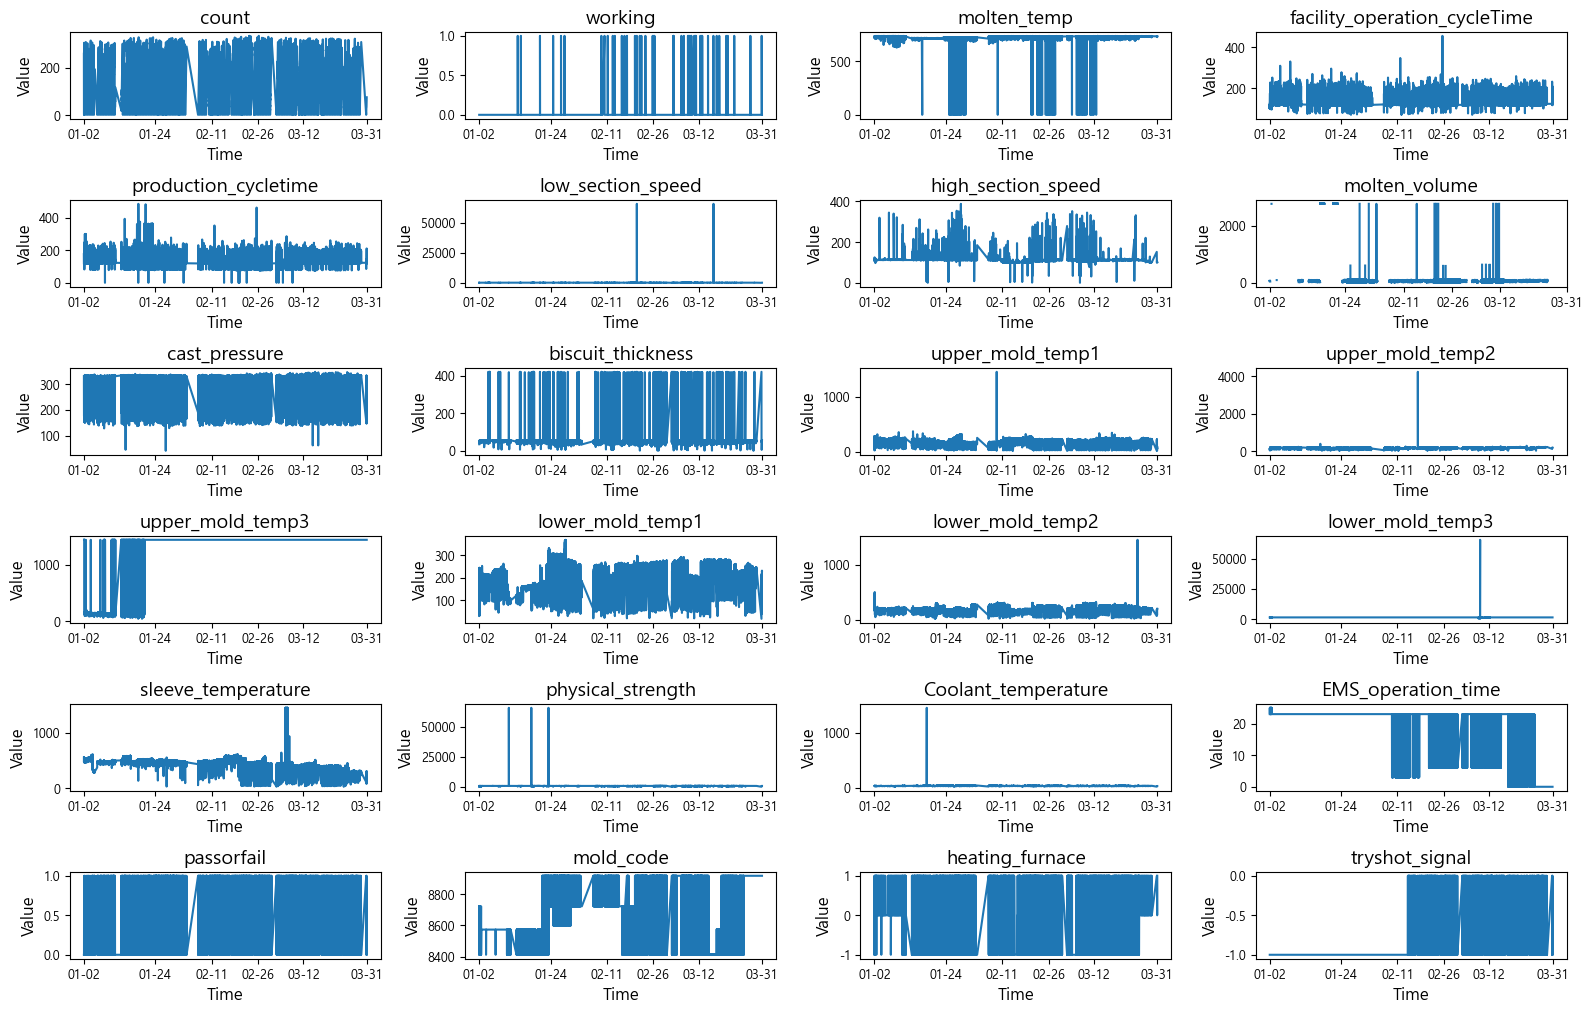

In [196]:
# 'mold_code_dfs2' 그래프
fig = plt.figure(figsize=(16, 40))

for i in range(mold_code_dfs[1].shape[1]):
    # for i in range(mold_code_dfs[j].shape[1]):
    ax = fig.add_subplot(24, 4, i+1)
    ax.set_title(filtered_df.columns[i], fontsize = 9, fontweight = 'bold')
    ax.plot(filtered_df.iloc[:, i])
    
    # x축에 4개의 인덱스만 표시
    ticks = filtered_df.index[::len(filtered_df)//5]  # 4개의 인덱스 선택
    ax.set_xticks(ticks)
    ax.set_xticklabels([d.strftime('%m-%d') for d in ticks])  # 날짜 형식으로 표시
    
    ax.set_xlabel('Time', fontsize = 12)
    ax.set_ylabel('Value', fontsize = 12, rotation = 90)
    ax.set_title(filtered_df.columns[i], fontsize=14)

# 서브플롯 간의 수직 간격 조정
plt.subplots_adjust(hspace=3)

# 그래프 레이아웃 자동조정
plt.tight_layout()
plt.show()

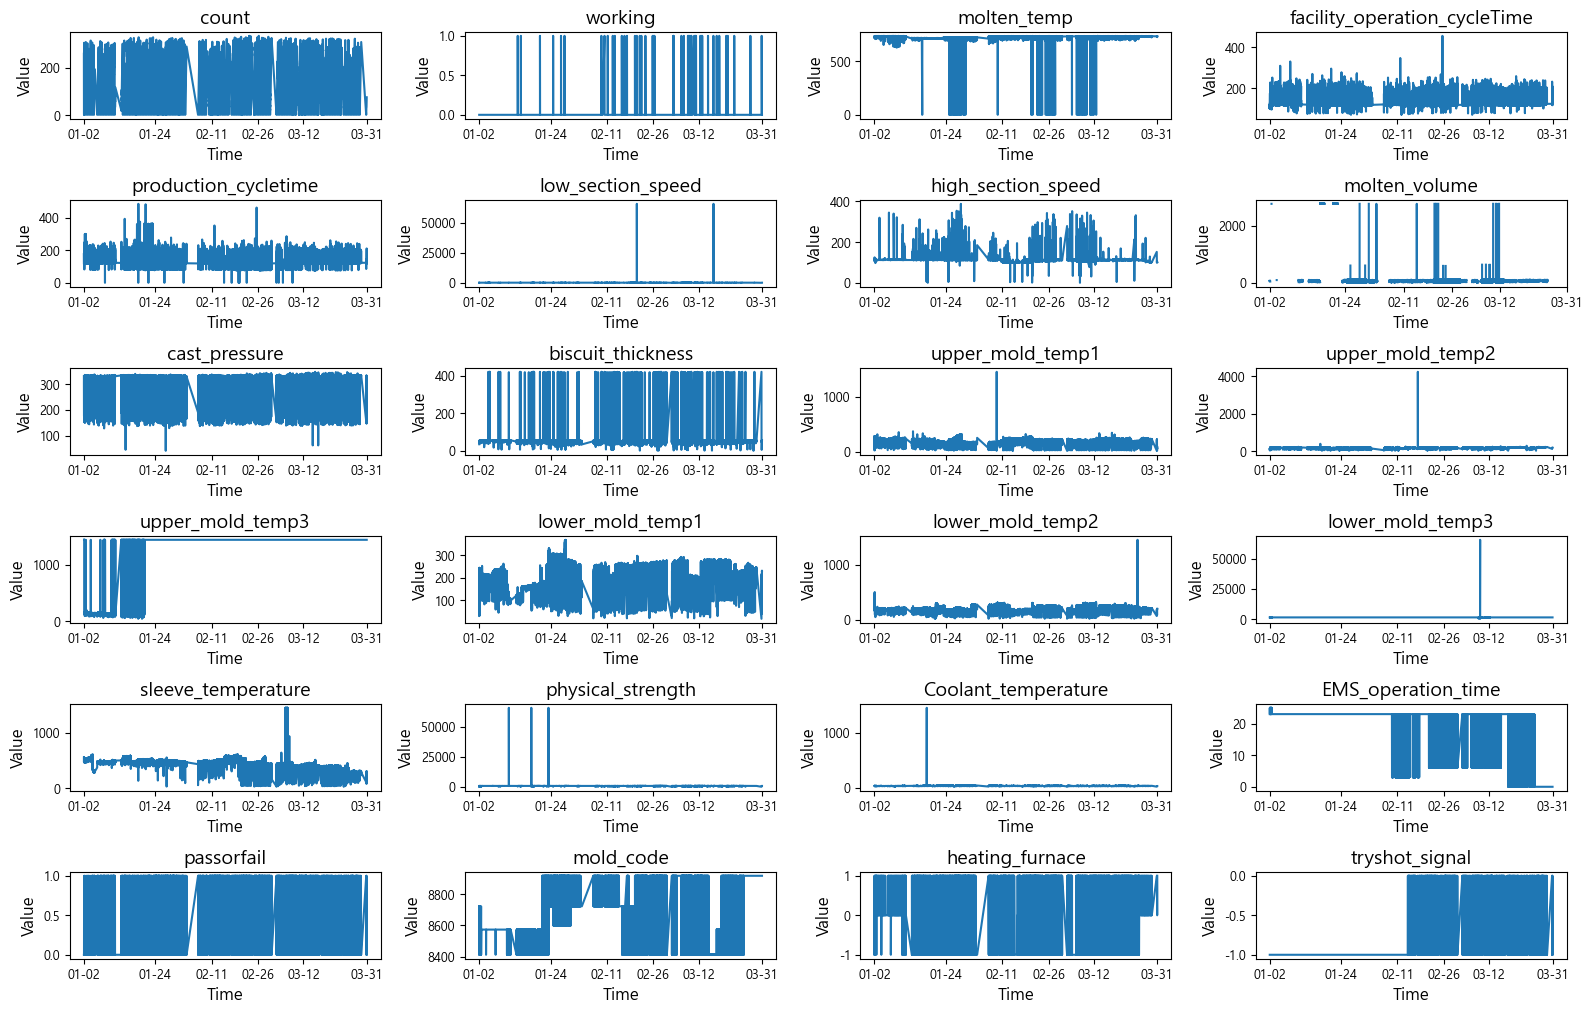

In [197]:
# 'mold_code_dfs3' 그래프
fig = plt.figure(figsize=(16, 40))

for i in range(mold_code_dfs[2].shape[1]):
    # for i in range(mold_code_dfs[j].shape[1]):
    ax = fig.add_subplot(24, 4, i+1)
    ax.set_title(filtered_df.columns[i], fontsize = 9, fontweight = 'bold')
    ax.plot(filtered_df.iloc[:, i])
    
    # x축에 4개의 인덱스만 표시
    ticks = filtered_df.index[::len(filtered_df)//5]  # 4개의 인덱스 선택
    ax.set_xticks(ticks)
    ax.set_xticklabels([d.strftime('%m-%d') for d in ticks])  # 날짜 형식으로 표시
    
    ax.set_xlabel('Time', fontsize = 12)
    ax.set_ylabel('Value', fontsize = 12, rotation = 90)
    ax.set_title(filtered_df.columns[i], fontsize=14)

# 서브플롯 간의 수직 간격 조정
plt.subplots_adjust(hspace=3)

# 그래프 레이아웃 자동조정
plt.tight_layout()
plt.show()

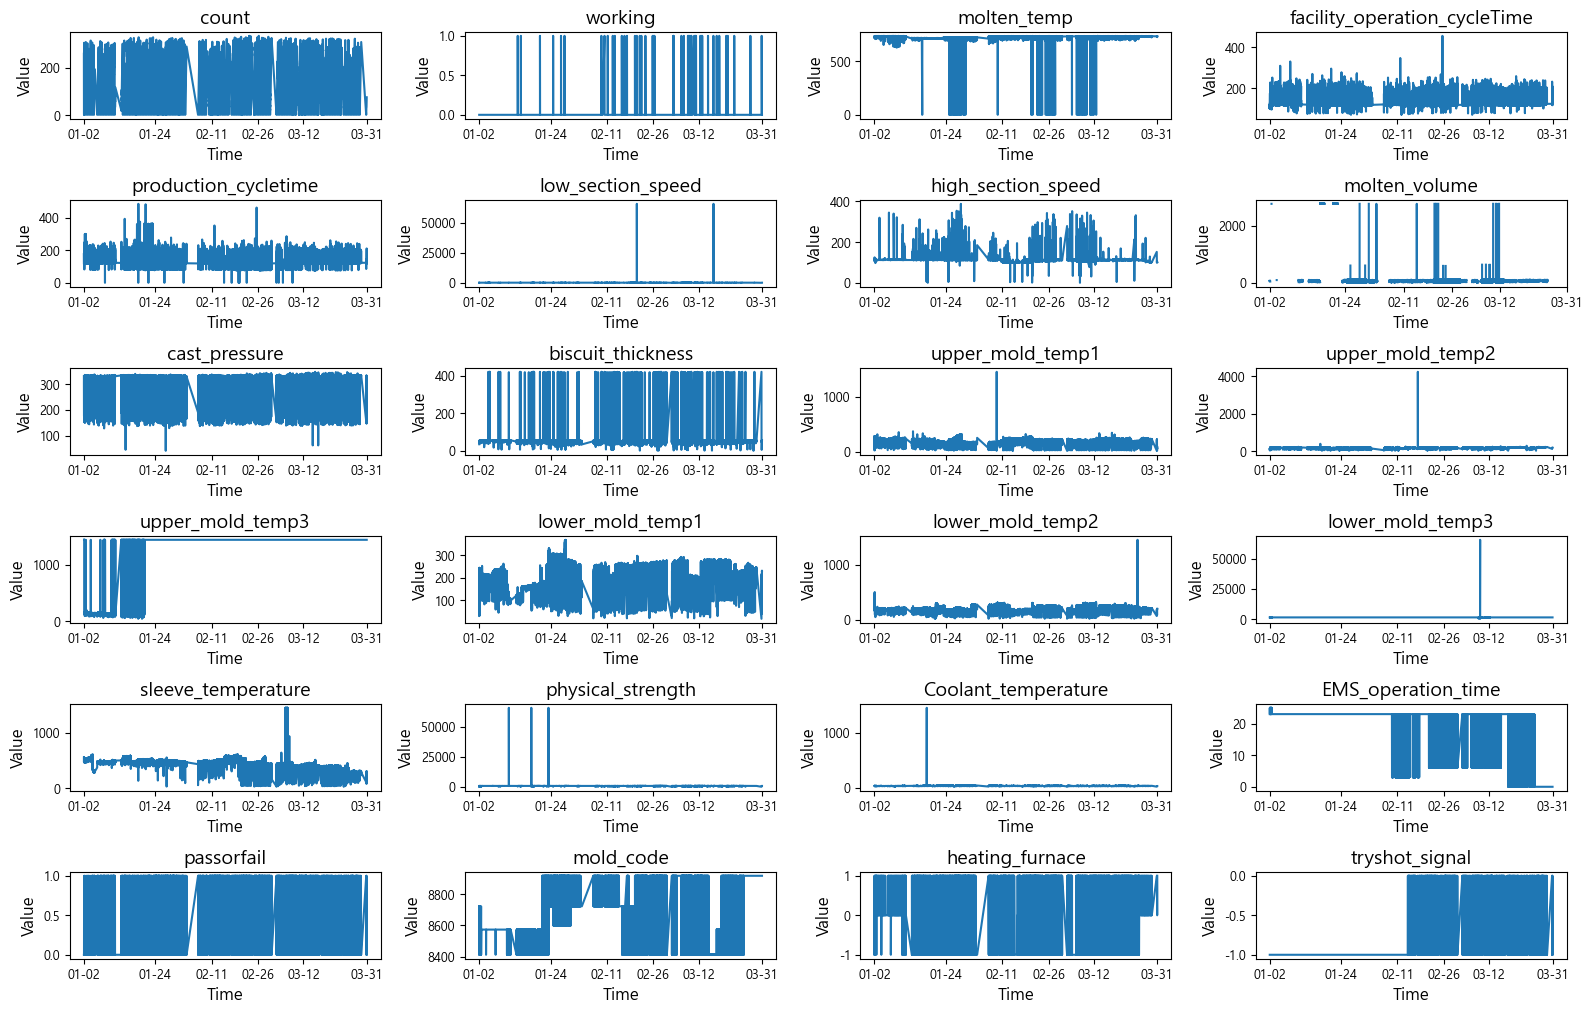

In [198]:
# 'mold_code_dfs4' 그래프
fig = plt.figure(figsize=(16, 40))

for i in range(mold_code_dfs[3].shape[1]):
    # for i in range(mold_code_dfs[j].shape[1]):
    ax = fig.add_subplot(24, 4, i+1)
    ax.set_title(filtered_df.columns[i], fontsize = 9, fontweight = 'bold')
    ax.plot(filtered_df.iloc[:, i])
    
    # x축에 4개의 인덱스만 표시
    ticks = filtered_df.index[::len(filtered_df)//5]  # 4개의 인덱스 선택
    ax.set_xticks(ticks)
    ax.set_xticklabels([d.strftime('%m-%d') for d in ticks])  # 날짜 형식으로 표시
    
    ax.set_xlabel('Time', fontsize = 12)
    ax.set_ylabel('Value', fontsize = 12, rotation = 90)
    ax.set_title(filtered_df.columns[i], fontsize=14)

# 서브플롯 간의 수직 간격 조정
plt.subplots_adjust(hspace=3)

# 그래프 레이아웃 자동조정
plt.tight_layout()
plt.show()

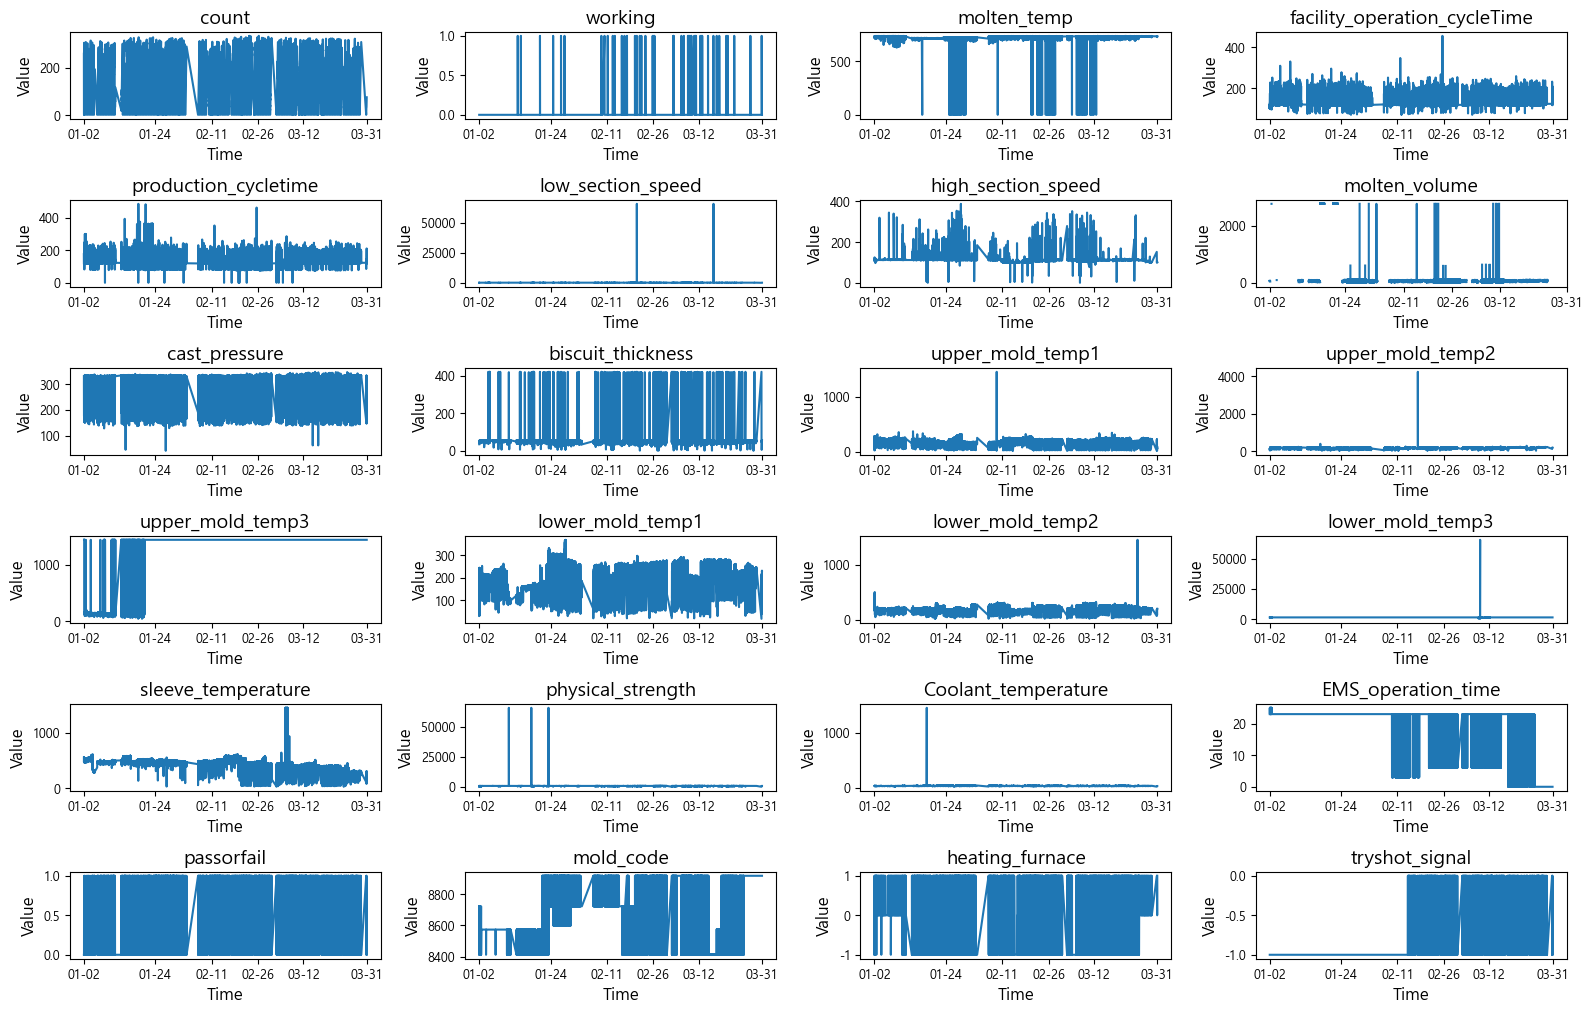

In [199]:
# 'mold_code_dfs5' 그래프
fig = plt.figure(figsize=(16, 40))

for i in range(mold_code_dfs[4].shape[1]):
    # for i in range(mold_code_dfs[j].shape[1]):
    ax = fig.add_subplot(24, 4, i+1)
    ax.set_title(filtered_df.columns[i], fontsize = 9, fontweight = 'bold')
    ax.plot(filtered_df.iloc[:, i])
    
    # x축에 4개의 인덱스만 표시
    ticks = filtered_df.index[::len(filtered_df)//5]  # 4개의 인덱스 선택
    ax.set_xticks(ticks)
    ax.set_xticklabels([d.strftime('%m-%d') for d in ticks])  # 날짜 형식으로 표시
    
    ax.set_xlabel('Time', fontsize = 12)
    ax.set_ylabel('Value', fontsize = 12, rotation = 90)
    ax.set_title(filtered_df.columns[i], fontsize=14)

# 서브플롯 간의 수직 간격 조정
plt.subplots_adjust(hspace=3)

# 그래프 레이아웃 자동조정
plt.tight_layout()
plt.show()

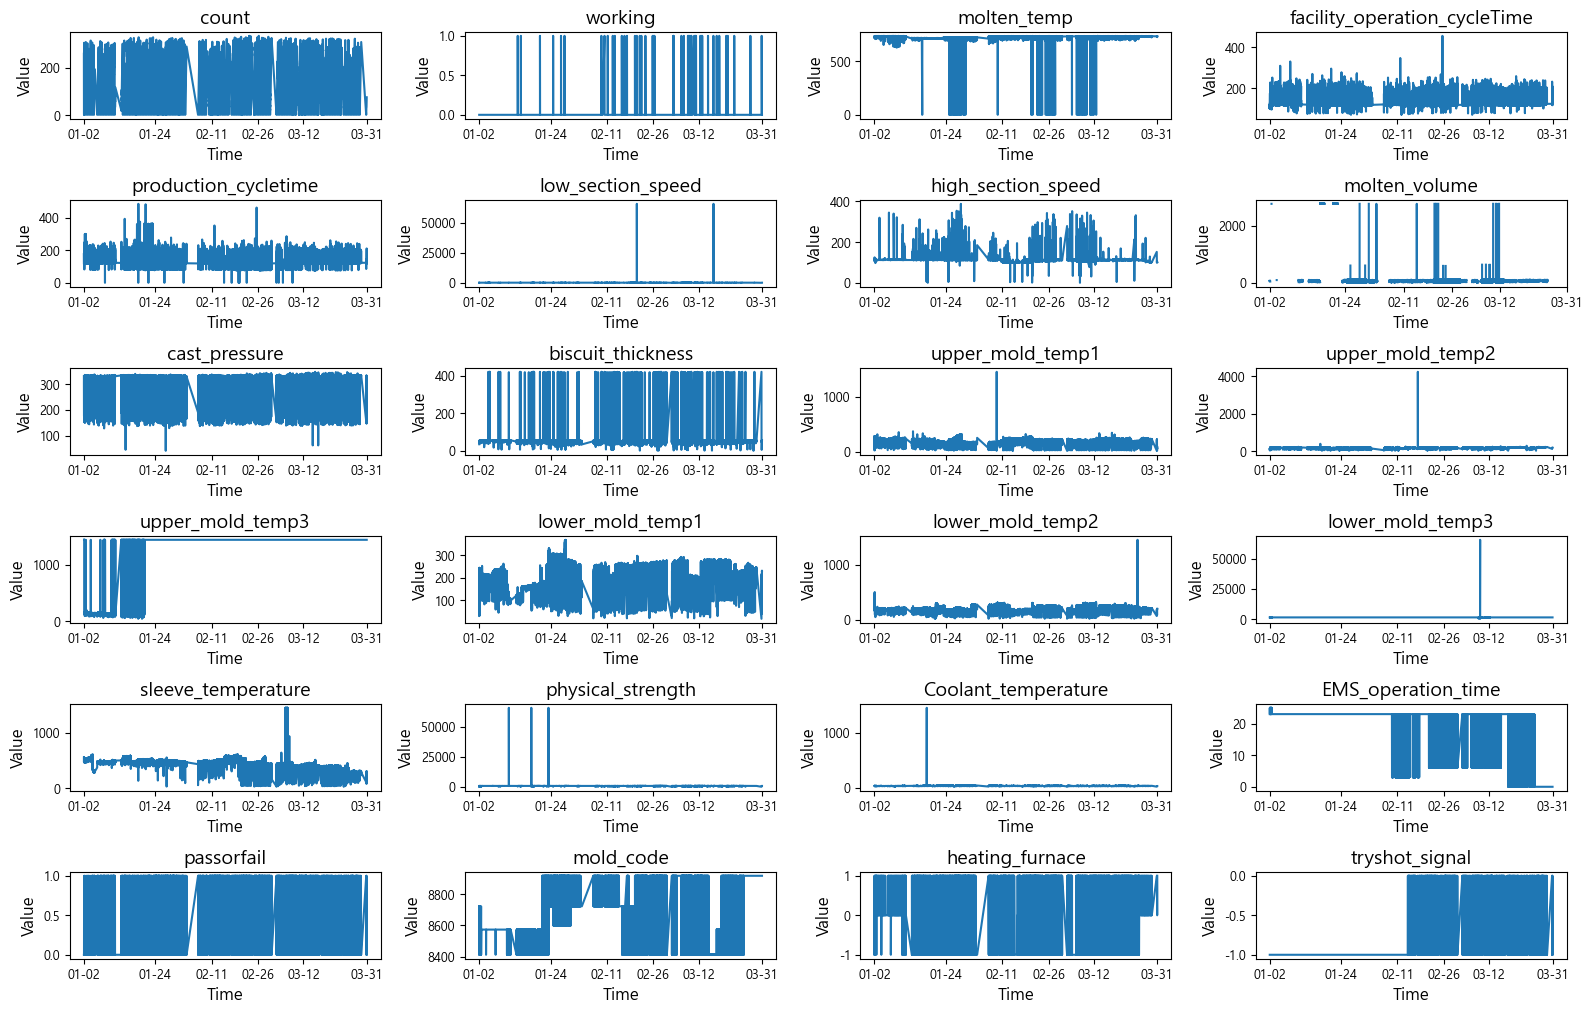

In [200]:
# 'mold_code_dfs5' 그래프
fig = plt.figure(figsize=(16, 40))

for i in range(mold_code_dfs[5].shape[1]):
    # for i in range(mold_code_dfs[j].shape[1]):
    ax = fig.add_subplot(24, 4, i+1)
    ax.set_title(filtered_df.columns[i], fontsize = 9, fontweight = 'bold')
    ax.plot(filtered_df.iloc[:, i])
    
    # x축에 4개의 인덱스만 표시
    ticks = filtered_df.index[::len(filtered_df)//5]  # 4개의 인덱스 선택
    ax.set_xticks(ticks)
    ax.set_xticklabels([d.strftime('%m-%d') for d in ticks])  # 날짜 형식으로 표시
    
    ax.set_xlabel('Time', fontsize = 12)
    ax.set_ylabel('Value', fontsize = 12, rotation = 90)
    ax.set_title(filtered_df.columns[i], fontsize=14)

# 서브플롯 간의 수직 간격 조정
plt.subplots_adjust(hspace=3)

# 그래프 레이아웃 자동조정
plt.tight_layout()
plt.show()

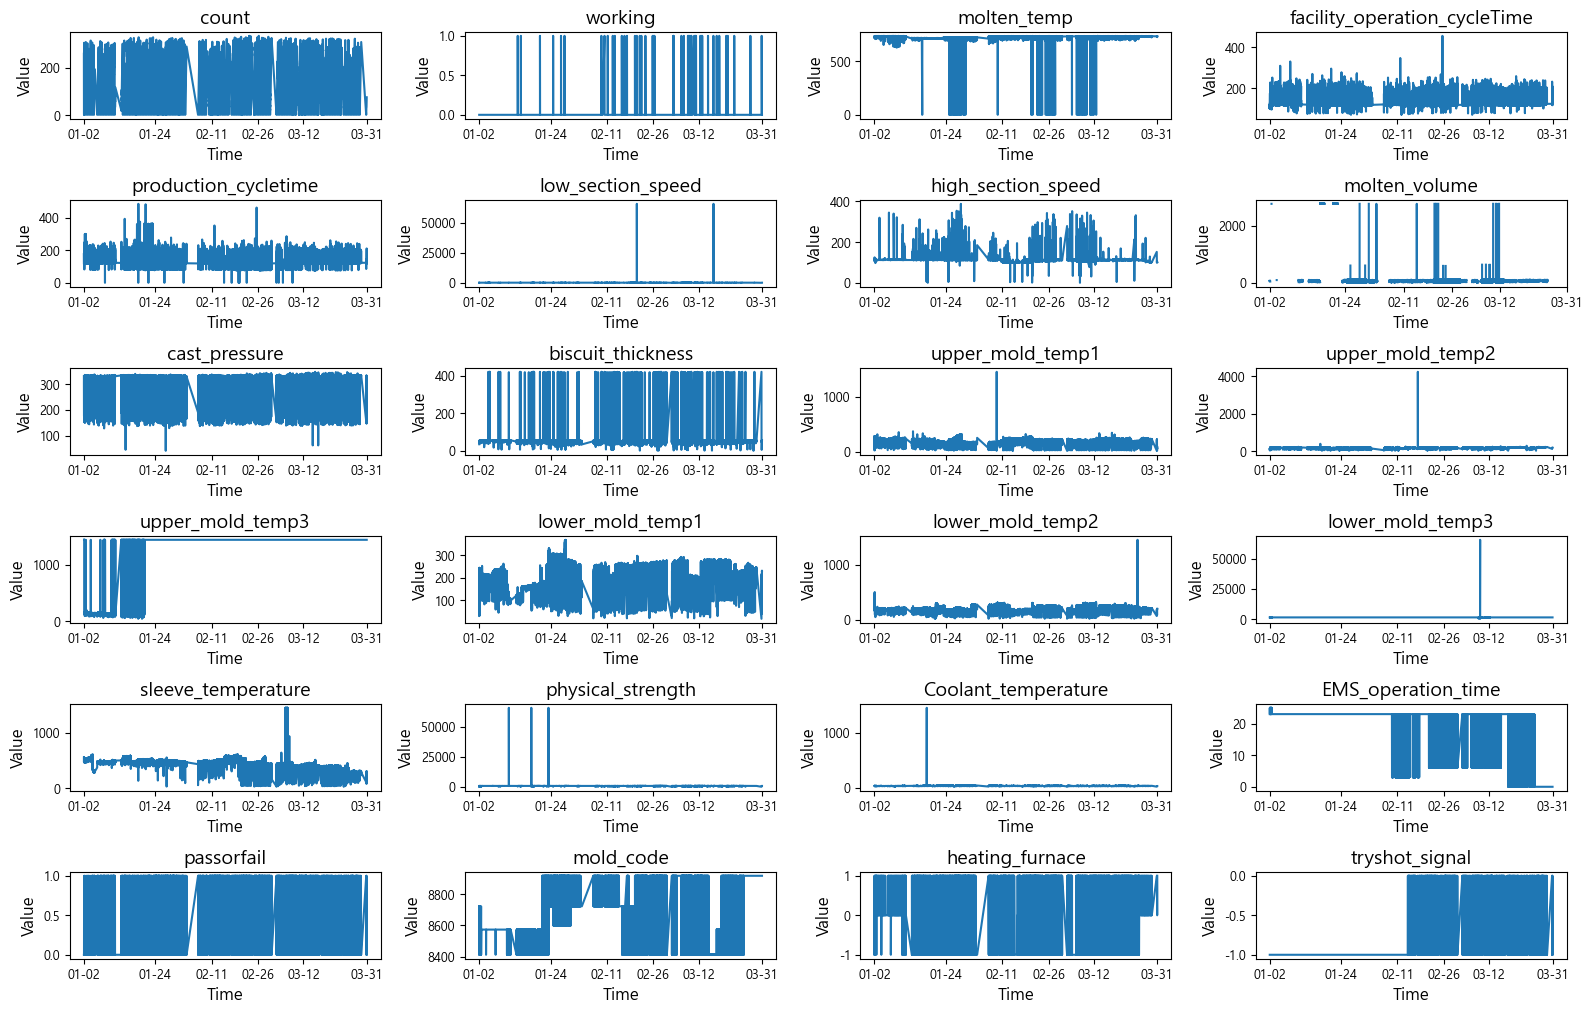

In [201]:
# 'mold_code_dfs5' 그래프
fig = plt.figure(figsize=(16, 40))

for i in range(mold_code_dfs[6].shape[1]):
    # for i in range(mold_code_dfs[j].shape[1]):
    ax = fig.add_subplot(24, 4, i+1)
    ax.set_title(filtered_df.columns[i], fontsize = 9, fontweight = 'bold')
    ax.plot(filtered_df.iloc[:, i])
    
    # x축에 4개의 인덱스만 표시
    ticks = filtered_df.index[::len(filtered_df)//5]  # 4개의 인덱스 선택
    ax.set_xticks(ticks)
    ax.set_xticklabels([d.strftime('%m-%d') for d in ticks])  # 날짜 형식으로 표시
    
    ax.set_xlabel('Time', fontsize = 12)
    ax.set_ylabel('Value', fontsize = 12, rotation = 90)
    ax.set_title(filtered_df.columns[i], fontsize=14)

# 서브플롯 간의 수직 간격 조정
plt.subplots_adjust(hspace=3)

# 그래프 레이아웃 자동조정
plt.tight_layout()
plt.show()